In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import plotly
from datetime import datetime


In [2]:
labels_df = pd.read_csv("../data/labelled_data_2017.csv")
raw_df = pd.read_csv("../data/BTC-2017min.csv")
date_format = '%Y-%m-%d %H:%M:%S'

raw_df['date'] = pd.Series(map(lambda x: datetime.strptime(x, date_format), raw_df['date']))
labels_df['date'] = pd.Series(map(lambda x: datetime.strptime(x, date_format), labels_df['date']))

In [3]:
try:
    labels_df.drop(columns=['symbol', 'unix', 'Volume BTC', 'avg', 'upper', 'lower'], inplace=True)
    raw_df.drop(columns=['symbol', 'unix', 'Volume BTC'], inplace=True)
except:
    pass # in case we already dropped columns inplace

In [12]:
df1 = raw_df[(raw_df['date'] <= labels_df['date'][0]) & (raw_df['date'] >= labels_df['date'][0] - pd.Timedelta(30, "m"))] 
df1.head()

,date,open,high,low,close,Volume USD
19,2017-12-31 23:40:00,13979.17,13979.17,13957.53,13957.61,27865.161450
20,2017-12-31 23:39:00,13932.16,13999.98,13932.16,13957.50,42634.673574
21,2017-12-31 23:38:00,13931.60,13999.81,13931.60,13999.81,58262.678321
22,2017-12-31 23:37:00,13999.91,13999.91,13963.22,13987.68,8218.677074
23,2017-12-31 23:36:00,13980.80,13980.80,13963.21,13963.89,25486.762583


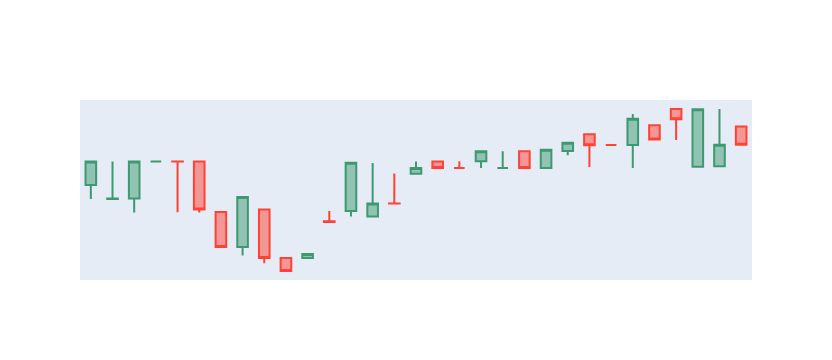

In [18]:
import plotly.graph_objects as go
fig = go.Figure(data= go.Candlestick(x=df1['date'],
                              open=df1['open'],
                              high=df1['high'],
                              low=df1['low'],
                              close=df1['close'],
                             ))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_xaxes(visible=False, showticklabels=False)
fig.show()

In [6]:

fig.write_image("../data/images/fig1.png")
